<a href="https://colab.research.google.com/github/luisfelipebp/classification-depression/blob/main/classification_depression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data-Science/Classificação/depression/me_cfs_vs_depression_dataset.csv')

In [3]:
df2 = pd.DataFrame.copy(df)

In [4]:
df.head(3)

,age,gender,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,56,Male,8.7,3.9,9.2,8.1,10.0,6.5,9.0,7.7,0,Working,Low,Daily,Yes,Depression
1,69,Male,1.3,9.9,4.2,9.9,20.0,7.0,41.0,8.4,1,Working,Low,Often,Yes,Both
2,46,Female,4.0,5.4,4.8,NaN,24.0,1.6,13.0,6.9,0,Partially working,NaN,Rarely,Yes,Depression


In [5]:
df.isna().sum()

,0
age,0
gender,0
sleep_quality_index,47
brain_fog_level,48
physical_pain_score,34
stress_level,48
depression_phq9_score,22
fatigue_severity_scale_score,21
pem_duration_hours,24
hours_of_sleep_per_night,21


In [6]:
df['sleep_quality_index'].value_counts()

,count
sleep_quality_index,
8.4,17
2.4,16
5.9,16
4.6,16
6.9,16
...,...
4.7,5
9.3,5
7.4,4


In [7]:
df['sleep_quality_index'].fillna(df['sleep_quality_index'].median(), inplace=True)
df['brain_fog_level'].fillna(df['brain_fog_level'].median(), inplace=True)
df['physical_pain_score'].fillna(df['physical_pain_score'].median(), inplace=True)
df['stress_level'].fillna(df['stress_level'].median(), inplace=True)
df['depression_phq9_score'].fillna(df['depression_phq9_score'].median(), inplace=True)
df['fatigue_severity_scale_score'].fillna(df['fatigue_severity_scale_score'].median(), inplace=True)
df['pem_duration_hours'].fillna(df['pem_duration_hours'].median(), inplace=True)
df['hours_of_sleep_per_night'].fillna(df['hours_of_sleep_per_night'].median(), inplace=True)
df['work_status'].fillna(df['work_status'].mode()[0], inplace=True)
df['social_activity_level'].fillna(df['social_activity_level'].mode()[0], inplace=True)
df['exercise_frequency'].fillna(df['exercise_frequency'].mode()[0], inplace=True)
df['meditation_or_mindfulness'].fillna(df['meditation_or_mindfulness'].mode()[0], inplace=True)

df['social_activity_level'] = df['social_activity_level'].replace({'Very low':0, 'Low':1, 'Medium':2, 'High':3, 'Very high':4})
df['exercise_frequency'] = df['exercise_frequency'].replace({'Never':0, 'Rarely':1, 'Sometimes':2, 'Often':3, 'Always':4, 'Daily': 5})

In [8]:
la = LabelEncoder()
df['diagnosis'] = la.fit_transform(df['diagnosis'])

In [ ]:
# df2 = pd.DataFrame.copy(df)

In [ ]:
# df2['social_activity_level'] = df2['social_activity_level'].replace({'Very low':0, 'Low':1, 'Medium':2, 'High':3, 'Very high':4})
# df2['exercise_frequency'] = df2['exercise_frequency'].replace({'Never':0, 'Rarely':1, 'Sometimes':2, 'Often':3, 'Always':4, 'Daily': 5})

In [ ]:
# la = LabelEncoder()
# df2['diagnosis'] = la.fit_transform(df2['diagnosis'])

In [9]:
onehotencoder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1, 11,14])], remainder='passthrough')

In [10]:
transformed_data = onehotencoder.fit_transform(df)

In [11]:
df2 = pd.DataFrame(transformed_data, columns=onehotencoder.get_feature_names_out())

In [12]:
df2.head(2)

,OneHot__gender_Female,OneHot__gender_Male,OneHot__work_status_Not working,OneHot__work_status_Partially working,OneHot__work_status_Working,OneHot__meditation_or_mindfulness_No,OneHot__meditation_or_mindfulness_Yes,remainder__age,remainder__sleep_quality_index,remainder__brain_fog_level,remainder__physical_pain_score,remainder__stress_level,remainder__depression_phq9_score,remainder__fatigue_severity_scale_score,remainder__pem_duration_hours,remainder__hours_of_sleep_per_night,remainder__pem_present,remainder__social_activity_level,remainder__exercise_frequency,remainder__diagnosis
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,56.0,8.7,3.9,9.2,8.1,10.0,6.5,9.0,7.7,0.0,1.0,5.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,69.0,1.3,9.9,4.2,9.9,20.0,7.0,41.0,8.4,1.0,1.0,3.0,0.0


In [13]:
df2.shape

(1000, 20)

In [15]:
X = df2.iloc[:, 0:19].values

In [16]:
y = df2.iloc[:, 19].values

# Base de Treino e Teste

In [17]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=77)

In [18]:
x_treino.shape, y_treino.shape

((800, 19), (800,))

In [19]:
x_teste.shape, y_teste.shape

((200, 19), (200,))

In [20]:
from imblearn.over_sampling import SMOTE

In [22]:
smote = SMOTE(random_state=7)

In [30]:
X_treino_re, y_treino_re = smote.fit_resample(x_treino, y_treino)

In [32]:
randomf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 7, max_depth=11)

In [33]:
randomf.fit(X_treino_re, y_treino_re)

RandomForestClassifier(criterion='entropy', max_depth=11, random_state=7)

In [34]:
y_predict = randomf.predict(x_teste)

In [39]:
print(classification_report(y_teste, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       1.00      1.00      1.00        77
         2.0       1.00      1.00      1.00        80

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [40]:
print(f'\nMatriz de confusão \n {confusion_matrix(y_teste,y_predict)}')


Matriz de confusão 
 [[43  0  0]
 [ 0 77  0]
 [ 0  0 80]]


# Methods

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def model_train(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)

    y_test_predict = model.predict(x_test)
    y_train_predict = model.predict(x_train)

    accuracy_train = accuracy_score(y_train_predict, y_train)
    accuracy_test = accuracy_score(y_test_predict,y_test)

    print("Métricas de Avaliação do Modelo:")
    print(f"  -> Acurácia (Treino): {accuracy_train:.4f}")
    print(f"  -> Acurácia (Teste):  {accuracy_test:.4f}")
    print(f'Classificação = \n {classification_report(y_test,y_test_predict)}')

    plt.figure(figsize=(10, 6))
    cm = confusion_matrix(y_test, y_test_predict)

    sns.heatmap(cm, annot=True, fmt="d" ,cmap = 'Blues', xticklabels=["Both", "Depression", "ME/CFS"], yticklabels=["Both", "Depression", "ME/CFS"])

    plt.xlabel('Previsto')
    plt.title('Matriz de confusão')
    plt.show()

    print(f'\nMatriz de confusão \n {confusion_matrix(y_test,y_test_predict)}\n')


In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def model_train_scaler(model,x_train,x_test,y_train,y_test):
    scaler = StandardScaler()
    x_train_scaler = scaler.fit_transform(x_train)
    x_test_scaler = scaler.transform(x_test)

    model.fit(x_train_scaler,y_train)

    y_train_predict = model.predict(x_train_scaler)
    y_test_predict = model.predict(x_test_scaler)

    accuracy_train = accuracy_score(y_train_predict, y_train)
    accuracy_test = accuracy_score(y_test_predict,y_test)

    print("Métricas de Avaliação do Modelo:")
    print(f"  -> Acurácia (Treino): {accuracy_train:.4f}")
    print(f"  -> Acurácia (Teste):  {accuracy_test:.4f}")
    print(f'Classificação = \n {classification_report(y_test,y_test_predict)}')

    plt.figure(figsize=(10, 6))
    cm = confusion_matrix(y_test, y_test_predict)

    sns.heatmap(cm, annot=True, fmt="d" ,cmap = 'Blues', xticklabels=["Both", "Depression", "ME/CFS"], yticklabels=["Both", "Depression", "ME/CFS"])

    plt.xlabel('Previsto')
    plt.title('Matriz de confusão')
    plt.show()

    print(f'\nMatriz de confusão \n {confusion_matrix(y_test,y_test_predict)}\n')

In [26]:
from sklearn.model_selection import KFold, cross_val_score

def cross_validation(splits, model, x, y):
  kfold = KFold(n_splits=splits, shuffle=True, random_state=77)
  scores = cross_val_score(model, x, y, cv=kfold)

  print("Coeficiente de Determinação médio: %.2f%%" % (scores.mean() * 100.0))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=1)

Métricas de Avaliação do Modelo:
  -> Acurácia (Treino): 0.8075
  -> Acurácia (Teste):  0.7500
Classificação = 
               precision    recall  f1-score   support

         0.0       0.67      0.37      0.48        43
         1.0       0.79      0.78      0.78        77
         2.0       0.74      0.93      0.82        80

    accuracy                           0.75       200
   macro avg       0.73      0.69      0.69       200
weighted avg       0.74      0.75      0.73       200



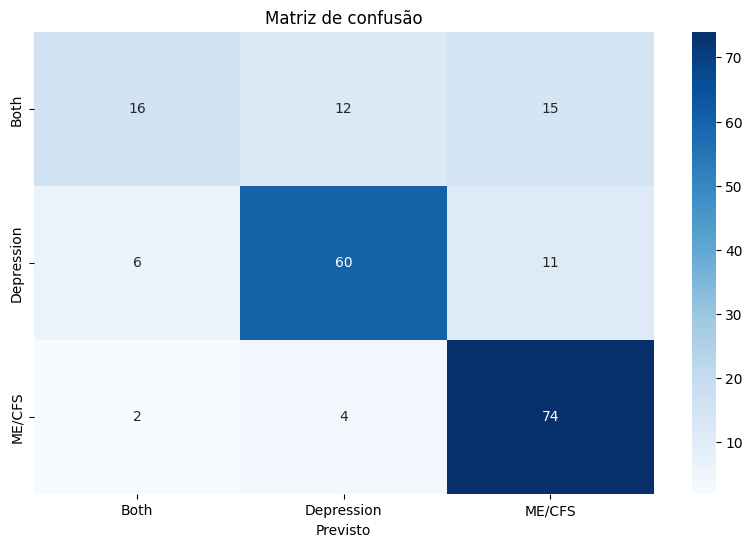


Matriz de confusão 
 [[16 12 15]
 [ 6 60 11]
 [ 2  4 74]]



In [ ]:
model_train(knn,x_treino,x_teste,y_treino,y_teste)

Métricas de Avaliação do Modelo:
  -> Acurácia (Treino): 0.8625
  -> Acurácia (Teste):  0.8650
Classificação = 
               precision    recall  f1-score   support

         0.0       0.90      0.42      0.57        43
         1.0       1.00      0.99      0.99        77
         2.0       0.76      0.99      0.86        80

    accuracy                           0.86       200
   macro avg       0.89      0.80      0.81       200
weighted avg       0.88      0.86      0.85       200



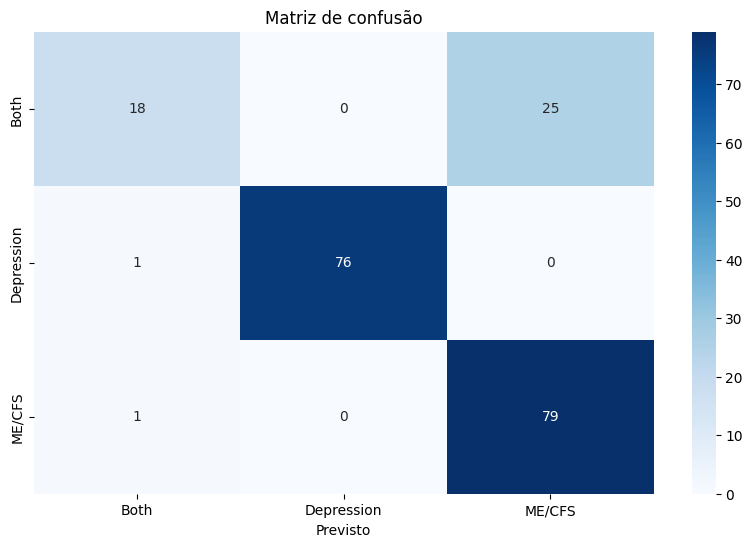


Matriz de confusão 
 [[18  0 25]
 [ 1 76  0]
 [ 1  0 79]]



In [ ]:
model_train_scaler(KNeighborsClassifier(n_neighbors=15, metric='minkowski', p=1),x_treino,x_teste,y_treino,y_teste)

In [ ]:
cross_validation(10, knn, X, y)

Coeficiente de Determinação médio: 73.20%


In [ ]:
from sklearn.svm import SVC

Métricas de Avaliação do Modelo:
  -> Acurácia (Treino): 0.9900
  -> Acurácia (Teste):  1.0000
Classificação = 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       1.00      1.00      1.00        77
         2.0       1.00      1.00      1.00        80

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



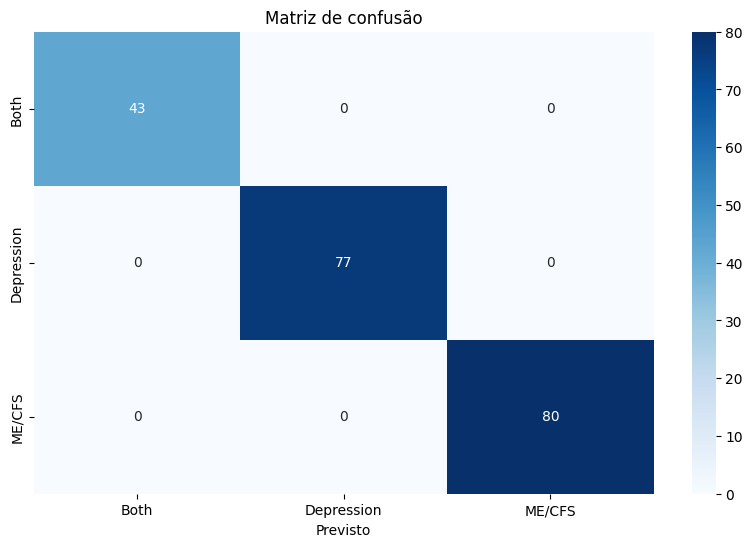


Matriz de confusão 
 [[43  0  0]
 [ 0 77  0]
 [ 0  0 80]]



In [ ]:
model_train(SVC(kernel='linear', random_state=7, C = 2),x_treino,x_teste,y_treino,y_teste)

Métricas de Avaliação do Modelo:
  -> Acurácia (Treino): 0.9475
  -> Acurácia (Teste):  0.9350
Classificação = 
               precision    recall  f1-score   support

         0.0       1.00      0.70      0.82        43
         1.0       1.00      1.00      1.00        77
         2.0       0.86      1.00      0.92        80

    accuracy                           0.94       200
   macro avg       0.95      0.90      0.92       200
weighted avg       0.94      0.94      0.93       200



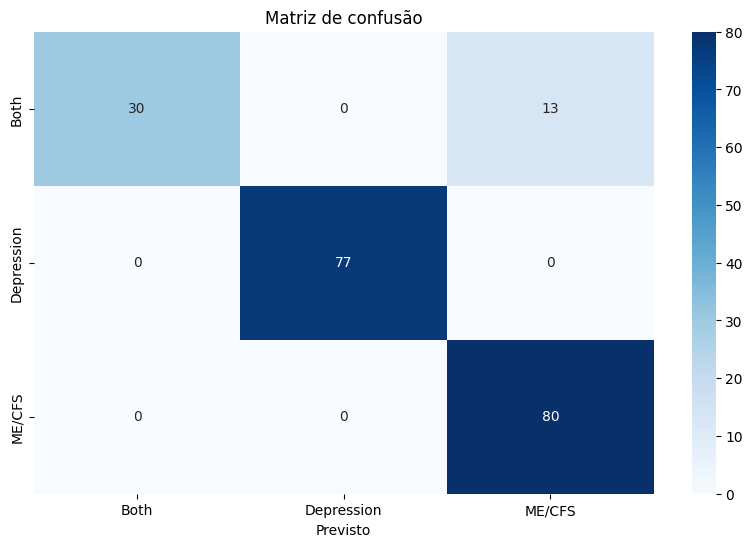


Matriz de confusão 
 [[30  0 13]
 [ 0 77  0]
 [ 0  0 80]]



In [ ]:
model_train_scaler(SVC(kernel='rbf', random_state=7, C = 2),x_treino,x_teste,y_treino,y_teste)

In [27]:
from sklearn.ensemble import RandomForestClassifier

Métricas de Avaliação do Modelo:
  -> Acurácia (Treino): 1.0000
  -> Acurácia (Teste):  1.0000
Classificação = 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       1.00      1.00      1.00        77
         2.0       1.00      1.00      1.00        80

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



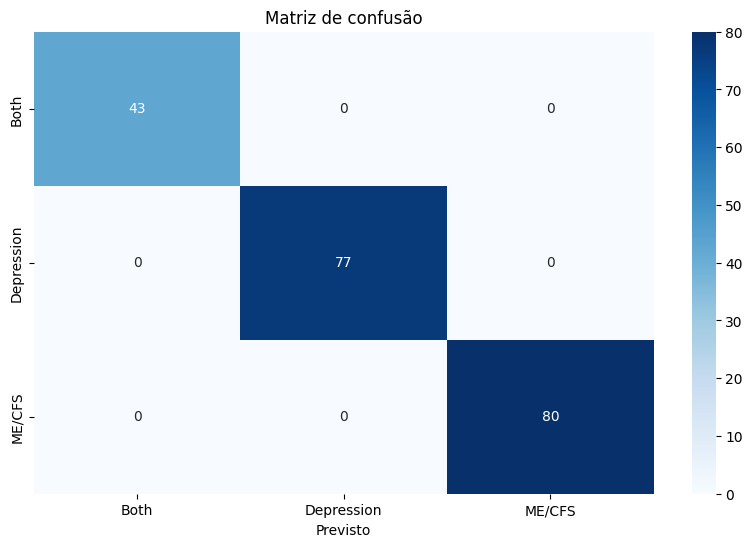


Matriz de confusão 
 [[43  0  0]
 [ 0 77  0]
 [ 0  0 80]]



In [28]:
model_train(RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 7, max_depth=11),x_treino,x_teste,y_treino,y_teste)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Métricas de Avaliação do Modelo:
  -> Acurácia (Treino): 1.0000
  -> Acurácia (Teste):  1.0000
Classificação = 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       1.00      1.00      1.00        77
         2.0       1.00      1.00      1.00        80

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



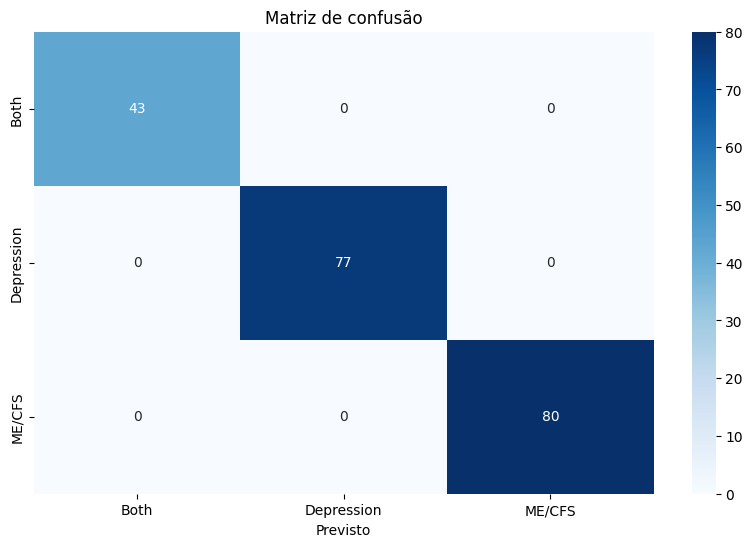


Matriz de confusão 
 [[43  0  0]
 [ 0 77  0]
 [ 0  0 80]]



In [ ]:
model_train(DecisionTreeClassifier(criterion='entropy', random_state = 7, max_depth=8),x_treino,x_teste,y_treino,y_teste)